# Introduction to Multiple Linear Regression 
<span style="font-size: 12px;">By: Marisol Hernandez</span>


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio


## 1. Recap of Simple Linear Regression
**Simple linear regression** is a statistical method used to model the relationship between a single independent variable (predictor variable) and a dependent variable (response variable). It assumes a linear relationship between the predictor and the response variable. The model equation for simple linear regression can be represented as:

$$\hat{y} = w_0 + w_1x$$

where:

- $\hat{y}$ is the dependent variable

- $w_{0}$ corresponds to the y-intercept 

- $w_{1}$ corresponds to the slope 

- $x$ is the independent variable

The objective of simple linear regression is to estimate the model parameters $w_0$ and $w_1$ ​that minimize the sum of squared differences between the observed and predicted values.

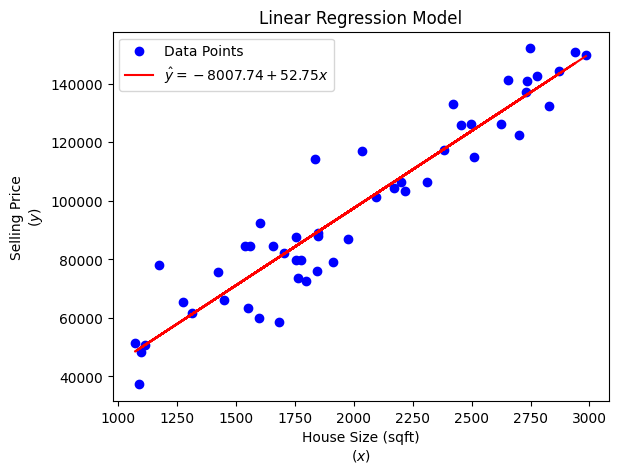

In [19]:
# Generate some random data for house sizes and selling prices
np.random.seed(0)
X = np.random.randint(1000, 3000, 50)  # House sizes in square feet
y = 50 * X + np.random.normal(0, 10000, 50)  # Selling prices

# Note: Typically you'd do a train/test split before fitting, but lets assume our original dataset is 
# our training set and we have some other hypothetical test set
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

# Make predictions for our original data
y_hat = model.predict(X.reshape(-1, 1))

# Plotting the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(X, y_hat, color='red', label=f'$\hat{{y}} = {round(model.intercept_, 2)} + {round(model.coef_[0], 2)}x$ ')

# Adding labels and title
plt.xlabel('House Size (sqft)\n$(x)$')
plt.ylabel('Selling Price\n$(y)$')
plt.title('Linear Regression Model')
plt.legend()

# Displaying the plot
plt.show()

## 2. Introducing Multiple Linear Regression
While simple linear regression deals with only one independent variable, **multiple linear regression** extends this concept to multiple independent variables. It allows us to model the relationship between two or more independent variables and a dependent variable. The model equation for multiple linear regression can be expressed as:

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_jx_j$$

where:

- $\hat{y}$ is the dependent variable

- $w_0$ corresponds to the y-intercept 

- $w_1, w_2, ..., w_j$ are the coefficients corresponding to each independent variable

- $x_1, x_2, ..., x_j$ are the independent variables

### The 3-D Model

Let's produce some synthetic data so that we can plot a 3D model expressed as:

$$\hat{y} = w_0 + w_1x_1 + w_2x_2$$

where:

- $\hat{y}$ is the dependent variable, *Selling Price*. We want to build an MLR model so we can predict *Selling Price* based on $x_1$ and $x_2$.

- $x_1$ is the independent variable, *House Size (sqft)*

- $x_2$ is the independent variable, *Age (yrs)*

- $w_0$ corresponds to the y-intercept 

- $w_1, w_2$ are the coefficients corresponding to each independent variable


In [20]:
# Generate random data for x1, x2, and y
num_points = 100
x1_data = np.random.uniform(500, 3000, num_points) 
x2_data = np.random.uniform(1, 10, num_points)      
y_data = 50000 + 200 * x1_data + 5000 * x2_data + np.random.normal(0, 50000, num_points)

df = pd.DataFrame({
    "House Size (sqft)": x1_data,
    "Age (yrs)": x2_data,
    "Selling Price": y_data,
})

df.head()

,House Size (sqft),Age (yrs),Selling Price
0,1939.866239,7.571098,588794.186641
1,2823.240494,3.807505,631572.766002
2,1296.422381,4.583990,284407.174001
3,2168.525950,2.888594,480849.069901
4,829.494656,2.675737,206097.817735


Now lets plot these data points in a 3D scatterplot.

In [21]:
# Create a trace
trace = go.Scatter3d(
    x=x1_data,
    y=x2_data,
    z=y_data,
    mode='markers',
    marker=dict(
        size=5,
        color='green',                # Set color to green
        opacity=0.8
    ),
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}'
)

# Assign a name to the trace
trace.name = 'Data'

# Layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='House Size (sqft)<br>          <i>(x<sub>1</sub>)</i>'),    # Set x-axis label
        yaxis=dict(title='Age (yrs)<br>   <i>(x<sub>2</sub>)</i>'),    # Set y-axis label
        zaxis=dict(title='Selling Price<br>        <i>(y)</i>'),      # Set z-axis label
    ),
    title='Interactive 3D Scatter Plot',
    width=900,
    height=600,
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show interactive plot
pio.show(fig)

We can see that even in 3D, there seems to be a linear relationship between the dependent variable, *Selling Price $(y)$*, and the two independent variables, *House Size $(x_1)$* and *Age $(x_2)$*.

## 3. Determining Model Parameters for the Hyperplane of Best Fit

### Gradient Descent for Multiple Linear Regression
The process for finding the optimial model parameters, $w_0, w_1, w_2, ..., w_j$, that minimize the cost function for multiple linear regression is similar to that of simple linear regression.

Recall in [Notebook 3: Simple Linear Regresion](03-simple-linear-regression.ipynb), we determined the cost function to be MSE:

$$ J(w) = \frac{1}{2n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i})^2$$

In simple linear regression, the gradient is only computed for $w_0$ and $w_1$. We can generalize the gradient for multiple linear regression. It involves taking the partial derivatives of the cost function with respect to each of the parameters:

For $w_0$,

$$\frac{\partial J(w)}{\partial w_0} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i})$$ 

For $w_1, w_2, ..., w_j$,

$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i}) \cdot x_{ij}$$

Where $x_{ij}$ represents the value of the $j$-th independent variable for the $i$-th data point.

For our 3D model the gradients for $w_1$ and $w_2$ are as follows,

For $w_1$,

$$\frac{\partial J(w)}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i}) \cdot x_{i1}$$

For $w_2$,

$$\frac{\partial J(w)}{\partial w_2} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i} - y_{i}) \cdot x_{i2}$$

We can find the weights manually through gradient descent. Keep in mind that weights found manually through gradient descent may differ from those found using `scikit-learn`. The cause of this could be a number of reasons including the learning rate and the number of epochs (number of iterations). Both are hyperparameters that significantly affect the convergence of the algorithm.

Going forward we will use `scikit-learn`, but it is important to understand that `scikit-learn` uses gradient descent under the hood to find the final model parameters.

### Linear Regression with `scikit-learn `
Lets fit an multiple linear regression model using `scikit-learn`.

In [22]:
# Note: Typically you'd do a train/test split before fitting, but lets assume our original dataset is 
# our training set and we have some other hypothetical test set
X = df[['House Size (sqft)', 'Age (yrs)']]
y = df['Selling Price']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

We are left with the final model parameters,

In [23]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 27198.45843587967
Coefficients: [ 206.21569151 6179.59989887]


With these values, we can write the equation of our final regression model,

$$\hat{y} = w_{0} + w_{1}x_1 + w_2x_2 = 27198.46 + 206.22x_1 + 6179.60x_2$$

where:


- $\hat{y}$ is the dependent variable, *Selling Price*

- $x_1$ is the independent variable, *House Size (sqft)*

- $x_2$ is the independent variable, *Age (yrs)*

- $w_0$ corresponds to the y-intercept 

- $w_1, w_2$ are the coefficients corresponding to each independent variable

If we plot this equation in our 3D scatterplot, we essentially get a hyperplane.

In [24]:
# Get the model parameters
w = [model.intercept_, model.coef_[0], model.coef_[1]]

# Create a trace for the hyperplane
x_range = np.linspace(min(x1_data), max(x1_data), 10)
y_range = np.linspace(min(x2_data), max(x2_data), 10)
X_range, Y_range = np.meshgrid(x_range, y_range)
Z_range = w[0] + w[1] * X_range + w[2] * Y_range

trace_hyperplane = go.Surface(
    x=X_range,
    y=Y_range,
    z=Z_range,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False,
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}',
)

# Create a trace for the data points
trace_data = go.Scatter3d(
    x=x1_data,
    y=x2_data,
    z=y_data,
    mode='markers',
    marker=dict(
        size=5,
        color='green',                
        opacity=0.8
    ),
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}'
)

# Assign a name to the trace
trace_data.name = 'Data'

# Layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='House Size (sqft)<br>          <i>(x<sub>1</sub>)</i>'),    
        yaxis=dict(title='Age (yrs)<br>   <i>(x<sub>2</sub>)</i>'),    
        zaxis=dict(title='Selling Price<br>        <i>(y)</i>'),      
    ),
    title='Interactive 3D Scatter Plot with Hyperplane',
    width=900,
    height=600,
)

# Create figure
fig = go.Figure(data=[trace_hyperplane, trace_data], layout=layout)

# Show interactive plot
pio.show(fig)

## 4. Evaluating Model Performance
We can evaluate our multiple linear regression model using the same metrics as we used for our simple linear regression model.

In [25]:
# Make predictions for our original data
y_hat = model.predict(X)

predictions_df = df.copy()
predictions_df["Predictions"] = y_hat
predictions_df

,House Size (sqft),Age (yrs),Selling Price,Predictions
0,1939.866239,7.571098,588794.186641,474015.674410
1,2823.240494,3.807505,631572.766002,632923.806465
2,1296.422381,4.583990,284407.174001,322868.317675
3,2168.525950,2.888594,480849.069901,492232.890350
4,829.494656,2.675737,206097.817735,214788.256954
...,...,...,...,...
95,1094.732053,1.119132,238008.181643,259865.172120
96,2835.534995,4.125102,618488.516810,637421.746012
97,2034.914890,2.333268,473366.896191,461248.500774
98,1839.082008,9.836465,464890.151490,467231.441457


When evaluating a linear regression model, it's important to assess its performance on both the training set and the test set. For just this lesson, we are evaluating model metrics for just the training set.

In [26]:
# Calculate MAE
mae = metrics.mean_absolute_error(y, y_hat)

# Calculate MSE
mse = metrics.mean_squared_error(y, y_hat)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared score
r_squared = metrics.r2_score(y, y_hat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R^2): {r_squared}")

Mean Absolute Error (MAE): 37848.80695233547
Mean Squared Error (MSE): 2333820272.3144293
Root Mean Squared Error (RMSE): 48309.629188335006
R-squared Score (R^2): 0.900149305881916


With the calculated RMSE, we can tell our stakeholders that our model's predictions are off by ~$48,309.63 on average.

## 5. Making Predictions
Let's say a homeowner with a 5-yr old 2,000 sqft house wants to put their house up for sale. We can use our MLR model to predict a selling price for the house.

In [27]:
# Define a new data point
new_data_point = pd.DataFrame({
    "House Size (sqft)": [2000],
    "Age (yrs)": [5],
})  # Example: House size = 2000 sqft, Age = 5 years

# Make a prediction on the new data point
prediction = model.predict(new_data_point)

print(f"Predicted selling price: ${round(prediction[0], 2)}")

Predicted selling price: $470527.84


We can also see where this prediction lies in our regression hyperplane,

In [28]:
trace_hyperplane = go.Surface(
    x=X_range,
    y=Y_range,
    z=Z_range,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False,
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}',
)

# Create a trace for the data points
trace_data = go.Scatter3d(
    x=x1_data,
    y=x2_data,
    z=y_data,
    mode='markers',
    marker=dict(
        size=5,
        color='green',                
        opacity=0.8
    ),
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}',
)

# Convert the new data point to a NumPy array
new_data_point_np = new_data_point.to_numpy()

# Create a trace for the new data point and its prediction
trace_new_point = go.Scatter3d(
    x=[new_data_point_np[0, 0]],
    y=[new_data_point_np[0, 1]],
    z=[prediction[0]],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        symbol='x',
        opacity=1
    ),
    hoverinfo='text',
    hovertemplate='<b>x1:</b> %{x:.2f}<br><b>x2:</b> %{y:.2f}<br><b>y:</b> %{z:.2f}',
)

# Layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='House Size (sqft)<br>          <i>(x<sub>1</sub>)</i>'),    
        yaxis=dict(title='Age (yrs)<br>   <i>(x<sub>2</sub>)</i>'),    
        zaxis=dict(title='Selling Price<br>        <i>(y)</i>'),      
    ),
    title='Interactive 3D Scatter Plot with Hyperplane',
    width=900,
    height=600,
)

# Create figure
fig = go.Figure(data=[trace_hyperplane, trace_data, trace_new_point], layout=layout)

# Show interactive plot
pio.show(fig)